In [1]:
import numpy as np
import os
from itertools import permutations
from typing import List, Tuple, Union
import time
import matplotlib.pyplot as plt
from tqdm import tqdm


In [2]:
CURRENT_DIR = os.getcwd()
WORDLIST_DIR = CURRENT_DIR + "/word lists/"
WORDLIST = os.listdir(WORDLIST_DIR)[0]
word_list = np.loadtxt(fname=WORDLIST_DIR+WORDLIST,dtype=str,skiprows=2).tolist()

In [3]:
word_list[:10]

['AA',
 'AAH',
 'AAHED',
 'AAHING',
 'AAHS',
 'AAL',
 'AALII',
 'AALIIS',
 'AALS',
 'AARDVARK']

In [4]:
class Trie:
    def __init__(self):
        self.root = {}
        self.END_TOKEN = '*'

    def insert(self, word: str) -> None:
        current = self.root
        for letter in word:
            if letter not in current:
                current[letter] = {}
            current = current[letter]
        current[self.END_TOKEN] = True

    def search(self, word: str) -> bool:
        current = self.root
        for letter in word:
            if letter not in current:
                return False
            current = current[letter]
        return self.END_TOKEN in current

trie = Trie()
trie.insert("monkey")
trie.insert("bicycle")
trie.root

{'m': {'o': {'n': {'k': {'e': {'y': {'*': True}}}}}},
 'b': {'i': {'c': {'y': {'c': {'l': {'e': {'*': True}}}}}}}}

In [9]:
trie.search("monkey")

True

In [5]:
for word in word_list:
    trie.insert(word.lower())

In [6]:
def all_permutations(s: str) -> List[str]:
    """ Calculates all n! permutations of given string. """
    return [''.join(p) for p in permutations(s)]

In [7]:
sample_size = 10
nr_samples = 100
max_word_length = hand_size = 7

filtered_word_list = [word for word in word_list if len(word) <= max_word_length]
trie_search_times = []
for _ in tqdm(range(nr_samples)):
    sample = np.random.choice(filtered_word_list,size=sample_size)

    current_trie_search_time = 0
    for word in sample:
        perms = all_permutations(word)
        initial = time.time()
        for perm in perms:
            a = trie.search(perm)
        final = time.time()
        current_trie_search_time += final-initial
    trie_search_times.append(current_trie_search_time / len(sample))


100%|██████████| 100/100 [00:01<00:00, 72.56it/s]


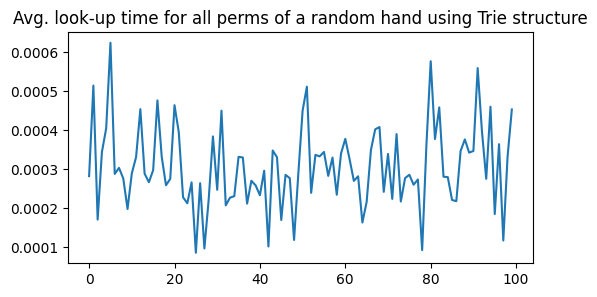

In [8]:
fig, ax = plt.subplots(1,1,figsize=(6,3))
ax.set_title("Avg. look-up time for all perms of a random hand using Trie structure")
ax.plot([i for i in range(nr_samples)],trie_search_times)